In [1]:
#!pip install mglearn

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

In [14]:
np.random.seed(0)

Text(0, 0.5, 'Average purchase price')

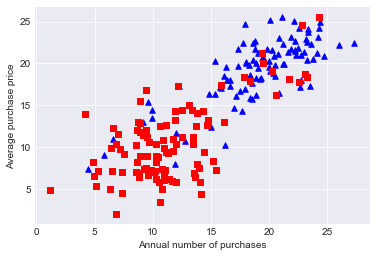

In [35]:
mean = [10,10] #平均値
cov = [[10,3],[3,10]] 
x1,y1 = np.random.multivariate_normal(mean,cov,100).T
true_false = np.random.rand(100) > 0.9
label1= np.where(true_false,1,0)

mean = [20,20]
cov = [[8,4],[4,8]]
x2,y2 = np.random.multivariate_normal(mean,cov,100).T
true_false = np.random.rand(100) > 0.1
label2 = np.where(true_false,1,0)

X=(np.r_[x1,x2])
Y=(np.r_[y1,y2])
label = (np.r_[label1,label2])

plt.scatter(X[label==1],Y[label==1],marker="^",s=30,
c="blue",edgecolors="blue",label="1:continue")
plt.scatter(X[label==0],Y[label==0],marker=",",s=30,
c="red",edgecolors="red",label="0:widthdraw")
plt.xlabel("Annual number of purchases")
plt.ylabel("Average purchase price")





In [38]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [39]:
#訓練データとテストデータに分割
Data = (np.c_[X,Y])
X_train,X_test,y_train,y_test = train_test_split(Data,label,random_state=0)

#ロジスティック回帰の適用
clf = linear_model.LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

LogisticRegression(random_state=0)

<AxesSubplot:>

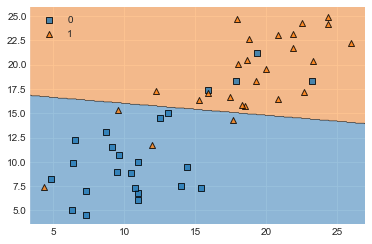

In [41]:
plot_decision_regions(X_test,y_test,clf=clf,res=0.01,legend=2)

In [45]:
print("Accuracy:{:.2f}".format(clf.score(X_test,y_test)))

label_prenew = clf.predict([[20,15]])
print(f"新たな顧客のラベルは{label_prenew}です。")

Accuracy:0.84
新たな顧客のラベルは[1]です。
